# Algoritmo de Árvore de Decisão - Decision Tree Classifier

## Link para o notebook principal

[Ir para main.ipynb](./main.ipynb)

## Índice

- [Modelos Utilizados](#modelos-utilizados)
- [Importando Pacotes e Bibliotecas](#importando-os-pacotes-e-bibliotecas)
- [Importando os Datasets](#importando-os-datasets)

## Importando os pacotes e bibliotecas

In [1]:
# biblioteca para realizar o corte teste | treino
from sklearn.model_selection import train_test_split

# biblioteca de classificacao
## Arvore de Decisao;
from sklearn.tree import DecisionTreeClassifier

# Biblioteca auxiliar para calcular os scores
from sklearn import metrics

import models.DecisionTree

## Impressao de Graficos
from matplotlib import pyplot as plt
import seaborn as sns

## Bibliotecas Base
import pandas as pd
import numpy as np

## Importando o dataset

In [2]:
df_residencial = pd.read_pickle("./databases/processed/classes-consumoComercialPorUF.pkl")

#### Divisão dos labels / dados

##### Dataset completo

In [3]:
X = df_residencial.drop(columns = ["consumo"])
y = df_residencial["consumo"]

##### Agrupando cada região separadamente

In [4]:
df_norte = df_residencial.iloc[0:7, :]
df_nordeste = df_residencial.iloc[8:16, :]
df_centro_oeste = df_residencial.iloc[21:23, :]
df_sudeste = df_residencial.iloc[17:20, :]
df_sul = df_residencial.iloc[24:, :]

In [8]:
X_norte = df_norte.drop(columns = ["consumo"])
y_norte = df_norte["consumo"]

X_nordeste = df_nordeste.drop(columns = ["consumo"])
y_nordeste = df_nordeste["consumo"]

X_centro_oeste = df_centro_oeste.drop(columns = ["consumo"])
y_centro_oeste = df_centro_oeste["consumo"]

X_sudeste = df_sudeste.drop(columns = ["consumo"])
y_sudeste = df_sudeste["consumo"]

X_sul = df_sul.drop(columns = ["consumo"])
y_sul = df_sul["consumo"]

#### Hiper parametros

In [9]:
semente_randomica = 42
divisao_treino_teste = 0.35

#### Dividindo dados de treino e dados de teste

##### Dataset completo

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = semente_randomica,
                                                    train_size = divisao_treino_teste)

##### Regiões agrupadas separadamente

In [12]:
X_norte_train, X_norte_test, y_norte_train, y_norte_test = train_test_split(X_norte,
                                                                            y_norte,
                                                                            train_size = 0.5,
                                                                            random_state = semente_randomica)

X_nordeste_train, X_nordeste_test, y_nordeste_train, y_nordeste_test = train_test_split(X_nordeste,
                                                                                        y_nordeste,
                                                                                        train_size = 0.5,
                                                                                        random_state = semente_randomica)

X_centro_oeste_train, X_centro_oeste_test, y_centro_oeste_train, y_centro_oeste_test = train_test_split(X_centro_oeste,
                                                                                                        y_centro_oeste,
                                                                                                        train_size = 0.5,
                                                                                                        random_state = semente_randomica)

X_sudeste_train, X_sudeste_test, y_sudeste_train, y_sudeste_test = train_test_split(X_sudeste,
                                                                                     y_sudeste,
                                                                                     train_size = 0.5,
                                                                                     random_state = semente_randomica)

X_sul_train, X_sul_test, y_sul_train, y_sul_test = train_test_split(X_sul,
                                                                    y_sul,
                                                                    train_size = 0.5,
                                                                    random_state = semente_randomica)

#### Criando o modelo

##### Dataset Completo

In [13]:
arvore_decisao = models.DecisionTree.DecisionTree()

###### Treinando e testando o modelo

In [14]:
arvore_decisao.fit(X_train, y_train)
y_predict = arvore_decisao.predict(X_test)

###### Avaliando o modelo

In [15]:
print("Acurácia: ", metrics.accuracy_score(y_true = y_test, y_pred = y_predict))

Acurácia:  0.8888888888888888


###### Impressão dos erros residuais

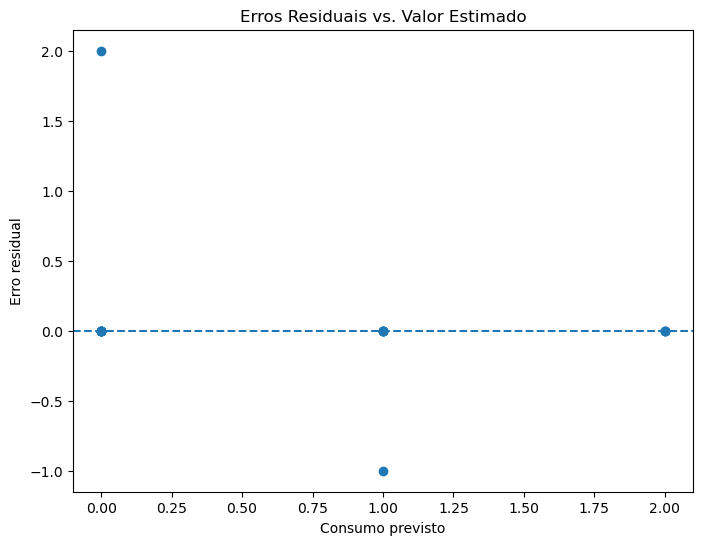

In [ ]:
figura = plt.figure(figsize = (8, 6))

erros_residuais = y_test - y_predict

plt.title("Erros Residuais vs. Valor Estimado")
plt.scatter(y_predict, erros_residuais)
plt.axhline(y = 0, linestyle = "--")
plt.xlabel("Consumo previsto")
plt.ylabel("Erro residual")

plt.show()

##### Dataset Região Norte

In [18]:
arvore_decisao = models.DecisionTree.DecisionTree()

###### Treinando e testando o modelo

In [19]:
arvore_decisao.fit(X_norte_train, y_norte_train)
y_predict = arvore_decisao.predict(X_norte_test)

###### Avaliando o modelo

In [20]:
print("Acurácia: ", metrics.accuracy_score(y_true = y_norte_test, y_pred = y_predict))

Acurácia:  1.0


###### Impressão dos erros residuais

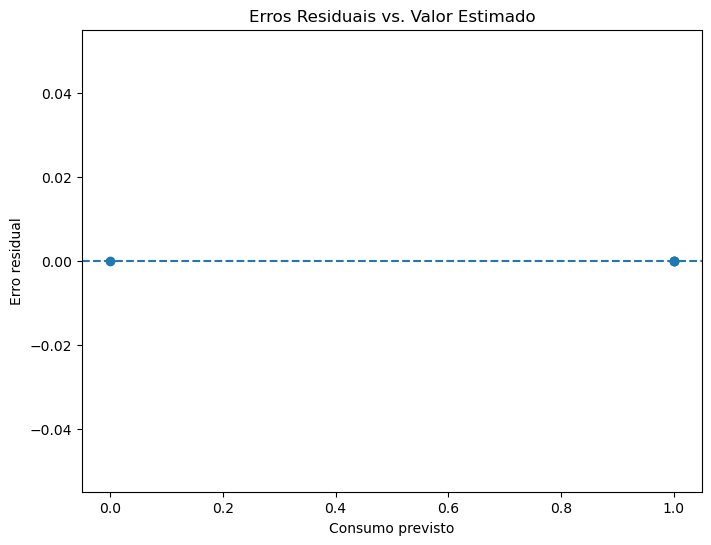

In [22]:
figura = plt.figure(figsize = (8, 6))

erros_residuais = y_norte_test - y_predict

plt.title("Erros Residuais vs. Valor Estimado")
plt.scatter(y_predict, erros_residuais)
plt.axhline(y = 0, linestyle = "--")
plt.xlabel("Consumo previsto")
plt.ylabel("Erro residual")

plt.show()

##### Dataset Região Nordeste

In [23]:
arvore_decisao = models.DecisionTree.DecisionTree()

###### Treinando e testando o modelo

In [24]:
arvore_decisao.fit(X_nordeste_train, y_nordeste_train)
y_predict = arvore_decisao.predict(X_norte_test)

###### Avaliando o modelo

In [25]:
print("Acurácia: ", metrics.accuracy_score(y_true = y_nordeste_test, y_pred = y_predict))

Acurácia:  0.25


###### Impressão dos erros residuais

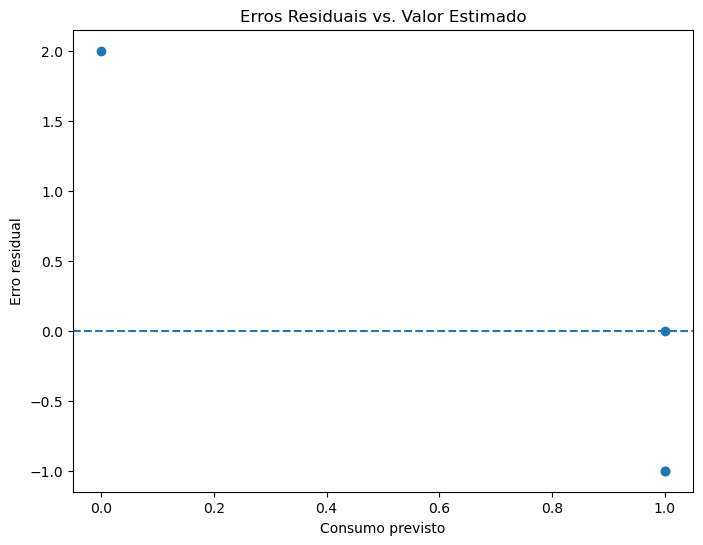

In [26]:
figura = plt.figure(figsize = (8, 6))

erros_residuais = y_nordeste_test - y_predict

plt.title("Erros Residuais vs. Valor Estimado")
plt.scatter(y_predict, erros_residuais)
plt.axhline(y = 0, linestyle = "--")
plt.xlabel("Consumo previsto")
plt.ylabel("Erro residual")

plt.show()

##### Dataset Região Centro-Oeste

In [27]:
arvore_decisao = models.DecisionTree.DecisionTree()

###### Treinando e testando o modelo

In [28]:
arvore_decisao.fit(X_centro_oeste_train, y_centro_oeste_train)
y_predict = arvore_decisao.predict(X_centro_oeste_test)

###### Avaliando o modelo

In [29]:
print("Acurácia: ", metrics.accuracy_score(y_true = y_centro_oeste_test, y_pred = y_predict))

Acurácia:  1.0


###### Impressão dos erros residuais

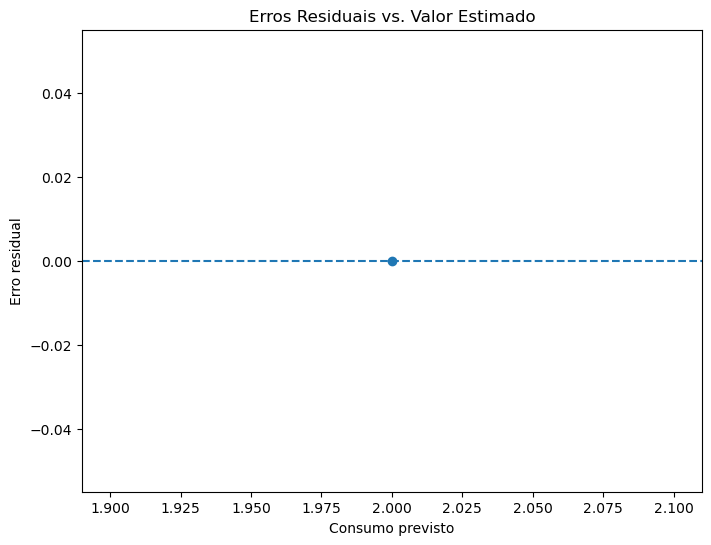

In [30]:
figura = plt.figure(figsize = (8, 6))

erros_residuais = y_centro_oeste_test - y_predict

plt.title("Erros Residuais vs. Valor Estimado")
plt.scatter(y_predict, erros_residuais)
plt.axhline(y = 0, linestyle = "--")
plt.xlabel("Consumo previsto")
plt.ylabel("Erro residual")

plt.show()

##### Dataset Região Sudeste

In [31]:
arvore_decisao = models.DecisionTree.DecisionTree()

###### Treinando e testando o modelo

In [32]:
arvore_decisao.fit(X_sudeste_train, y_sudeste_train)
y_predict = arvore_decisao.predict(X_sudeste_test)

###### Avaliando o modelo

In [33]:
print("Acurácia: ", metrics.accuracy_score(y_true = y_sudeste_test, y_pred = y_predict))

Acurácia:  0.5


###### Impressão dos erros residuais

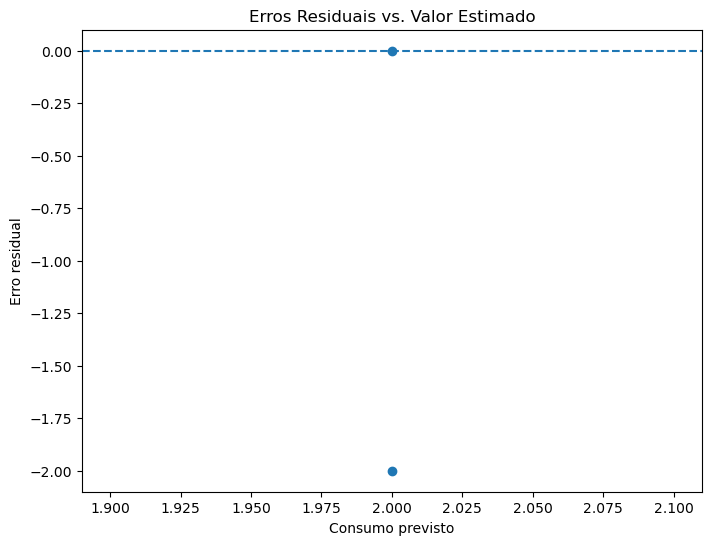

In [34]:
figura = plt.figure(figsize = (8, 6))

erros_residuais = y_sudeste_test - y_predict

plt.title("Erros Residuais vs. Valor Estimado")
plt.scatter(y_predict, erros_residuais)
plt.axhline(y = 0, linestyle = "--")
plt.xlabel("Consumo previsto")
plt.ylabel("Erro residual")

plt.show()

##### Dataset Região Sul

In [35]:
arvore_decisao = models.DecisionTree.DecisionTree()

###### Treinando e testando o modelo

In [39]:
arvore_decisao.fit(X_sul_train, y_sul_train)
y_predict = arvore_decisao.predict(X_sul_test)

###### Avaliando o modelo

In [40]:
print("Acurácia: ", metrics.accuracy_score(y_true = y_sul_test, y_pred = y_predict))

Acurácia:  1.0


###### Impressão dos erros residuais

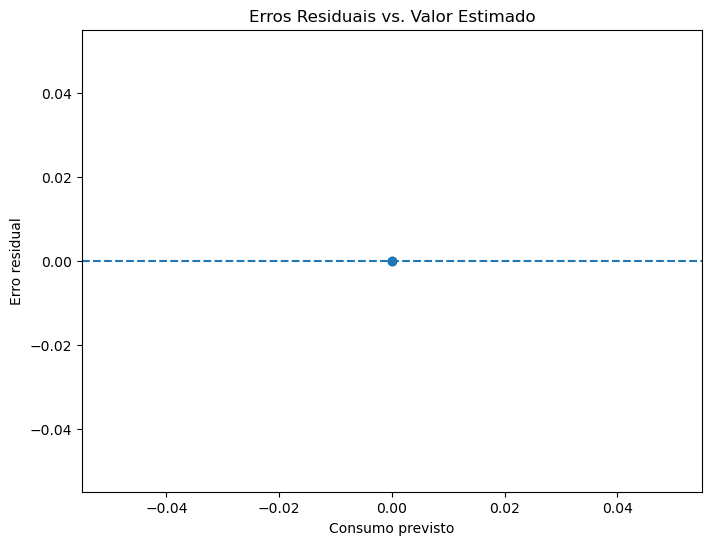

In [41]:
figura = plt.figure(figsize = (8, 6))

erros_residuais = y_sul_test - y_predict

plt.title("Erros Residuais vs. Valor Estimado")
plt.scatter(y_predict, erros_residuais)
plt.axhline(y = 0, linestyle = "--")
plt.xlabel("Consumo previsto")
plt.ylabel("Erro residual")

plt.show()